In [1]:
import sys
sys.path.append("/home/lishiyu/talib_test/data_process/")
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",2000)
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [68]:
from common.show_pv_tab import show_pv_tab,show3

from data_process.local_sql import read_sql,exch_detail
from data_process.kline import table_kline_period

In [ ]:
tb=exch_detail("rb")

In [282]:
tb1=table_kline_period("rb",1)
tb1.get_columns()

In [294]:
tb=exch_detail("rb")
tb.get_columns()

df=read_sql(f"""
select 
{",".join(('a.'+tb.col_type["name"]).tolist())},
{",".join(('b.'+tb1.col_type["name"].cc("MRM|MRT")).tolist())} 
from rb.tickdata as a
inner join rb.kline_1 as b
on a.date=b.date
and a.time=b.time
order by date,time
""")

In [295]:
df.shape

(4152511, 114)

In [103]:
#show_df=show3(df,1500,1500)
#show_df.to_excel("./test.xlsx")

# 1.关于盘口的一些大数据

In [160]:
display((df["AP1"]-df["BP1"]).value_counts())
display((df["AP1"]-df["AP1_last"]).value_counts().sort_index())
display((df["BP1"]-df["BP1_last"]).value_counts().sort_index())

1    495711
2      4258
3        22
4         5
6         2
5         2
dtype: int64

In [296]:
# AP1_last-----df_AP1-----AP1
#    |                     |  
#    |                     |  
# df1_last                df1
#    |                     |  
#    |                     |
# BP1_last-----df_BP1-----BP1  

dif1=df["AP1"]-df["BP1"]
dif1_last=df["AP1_last"]-df["BP1_last"]

dif_AP1=df["AP1"]-df["AP1_last"]
dif_BP1=df["BP1"]-df["BP1_last"]

pv_type=pd.concat([dif1,
    dif1_last,
    dif_AP1,
    dif_BP1],axis=1).apply(lambda x:tuple(x),axis=1)

In [171]:
(df["AP1"].shift(1)-df["AP1_last"]).value_counts().sort_index()

-40.0         1
-11.0         1
-8.0          1
-7.0          1
-6.0          3
-4.0          2
-3.0          3
-2.0          5
-1.0          5
 0.0     499955
 1.0          5
 2.0          2
 3.0          2
 4.0          1
 5.0          2
 6.0          1
 7.0          2
 9.0          1
 10.0         2
 14.0         1
 15.0         1
 24.0         1
 29.0         1
dtype: int64

In [297]:
# 3700 3700
# 3699 3699
status1=(pv_type==(1,1,0,0))
# 3700 3700
# 3699 
#      3698
status1_down_hf=(pv_type==(2,1,0,-1))
# 3700 
# 3699 3699  
#      3698
status1_down_1=(pv_type==(1,1,-1,-1))

#      3701 
# 3600 
# 3699 3699
status1_up_hf=(pv_type==(2,1,1,0))
#      3770
# 3769 3769  
# 3768 
status1_up_1=(pv_type==(1,1,1,1))

In [298]:
# 3700 3700
# 3699 3699
status2=(pv_type==(2,2,0,0))
# 3700 3700
# 3699 
#      3698
status2_down_hf=(pv_type==(1,2,-1,0))
# 3700 
# 3699 3699  
#      3698
status2_down_1=(pv_type==(2,2,-1,-1))
status2_down_1hf=(pv_type==(1,2,-2,-1))

#      3701 
# 3600 
# 3699 3699
status2_up_hf=(pv_type==(1,2,0,1))
#      3770
# 3769 3769  
# 3768 
status2_up_1=(pv_type==(2,2,1,1))
status2_up_1hf=(pv_type==(1,2,1,2))

In [202]:
display(pv_type.loc[status1.shift(1).fillna(False)].value_counts().sort_index())
display(pv_type.loc[status1_down_hf.shift(1).fillna(False)].value_counts().sort_index())
display(pv_type.loc[status1_down_1.shift(1).fillna(False)].value_counts().sort_index())

(1, 1, -4, -4)         1
(1, 1, -3, -3)         3
(1, 1, -2, -2)        69
(1, 1, -1, -1)     14969
(1, 1, 0, 0)      424053
(1, 1, 1, 1)       15017
(1, 1, 2, 2)          54
(1, 1, 3, 3)           5
(1, 1, 4, 4)           1
(1, 1, 5, 5)           1
(2, 1, -5, -6)         1
(2, 1, -3, -4)         1
(2, 1, -1, -2)        18
(2, 1, 0, -1)       1553
(2, 1, 1, 0)        1559
(2, 1, 2, 1)          25
(2, 2, 0, 0)           4
(3, 1, 0, -2)          2
(3, 1, 3, 1)           1
(3, 3, 0, 0)           1
(4, 4, 0, 0)           4
(5, 5, 0, 0)           1
(6, 6, 0, 0)           1
dtype: int64

(1, 2, -3, -2)       1
(1, 2, -2, -1)       7
(1, 2, -1, 0)     1407
(1, 2, 0, 1)       363
(1, 2, 1, 2)        11
(2, 2, -1, -1)       2
(2, 2, 0, 0)       120
(2, 2, 1, 1)         2
dtype: int64

(1, 1, -3, -3)        1
(1, 1, -2, -2)        5
(1, 1, -1, -1)      288
(1, 1, 0, 0)      14907
(1, 1, 1, 1)       1440
(1, 1, 2, 2)         40
(2, 1, -1, -2)        8
(2, 1, 0, -1)        45
(2, 1, 1, 0)        229
(2, 1, 2, 1)         11
(2, 1, 3, 2)          1
(2, 2, 0, 0)          2
(3, 1, -1, -3)        1
dtype: int64

In [204]:
display(pv_type.loc[status1_up_hf.shift(1).fillna(False)].value_counts().sort_index())
display(pv_type.loc[status1_up_1.shift(1).fillna(False)].value_counts().sort_index())

(1, 2, -4, -3)       1
(1, 2, -2, -1)      12
(1, 2, -1, 0)      368
(1, 2, 0, 1)      1396
(1, 2, 1, 2)        15
(2, 2, -2, -2)       1
(2, 2, -1, -1)       1
(2, 2, 0, 0)       103
(2, 2, 1, 1)         3
dtype: int64

(1, 1, -2, -2)       36
(1, 1, -1, -1)     1372
(1, 1, 0, 0)      15107
(1, 1, 1, 1)        321
(1, 1, 2, 2)          9
(1, 1, 3, 3)          1
(2, 1, -1, -2)       13
(2, 1, 0, -1)       242
(2, 1, 1, 0)         45
(2, 1, 2, 1)          3
(2, 1, 3, 2)          2
(2, 1, 4, 3)          1
(2, 2, 0, 0)          1
(3, 1, 3, 1)          2
dtype: int64

In [208]:
pv_type.loc[(status1_down_hf.shift(2)&status2_up_hf.shift(1)).fillna(False)].value_counts().sort_index()

(1, 1, -1, -1)     81
(1, 1, 0, 0)      247
(1, 1, 1, 1)        8
(2, 1, 0, -1)      26
(2, 1, 2, 1)        1
dtype: int64

In [ ]:
pv_type.loc[(status1_down_hf.shift(2)&status2_up_hf.shift(1)).fillna(False)].value_counts().sort_index()

# 情况 DOWN1 衍生特征

In [299]:
from common.dict_operator import DFPos
def exch_span(x):
    x1=DFPos(x)
    if len(x1)==0:
        return [None,None]
    return [max(x1),min(x1)]

In [300]:
df1=df[status1_down_1]

In [302]:
exch_m=pd.DataFrame(df1["D_exch"].apply(exch_span).tolist(),index=df1.index)

In [303]:
# 99.99% 都属于4种情况
(exch_m.T-df1["AP1"]).T.fillna(-999).apply(lambda x:tuple(x),axis=1).value_counts().sort_index(ascending=False)

(5.0, 0.0)              1
(5.0, -1.0)             2
(4.0, 0.0)              1
(4.0, -1.0)             3
(3.0, 0.0)              3
(3.0, -1.0)            10
(3.0, -3.0)             1
(2.0, 0.0)             71
(2.0, -1.0)           137
(2.0, -2.0)            10
(2.0, -3.0)             1
(1.0, 1.0)             34
(1.0, 0.0)          31305
(1.0, -1.0)         14790
(1.0, -2.0)            46
(1.0, -3.0)             6
(1.0, -4.0)             1
(0.0, 0.0)          61455
(0.0, -1.0)         42214
(0.0, -2.0)           182
(0.0, -3.0)            14
(0.0, -4.0)             6
(0.0, -5.0)             1
(-1.0, -1.0)           60
(-1.0, -2.0)            1
(-999.0, -999.0)      103
dtype: int64

In [304]:
D_exch=pd.DataFrame(df1.apply(lambda x:(
    x["D_exch"].get(x["AP1"]+2,0),
    x["D_exch"].get(x["AP1"]+1,0),
    x["D_exch"].get(x["AP1"],0),
    x["D_exch"].get(x["AP1"]-1,0),
    x["D_exch"].get(x["AP1"]-2,0)    
),axis=1).tolist(),index=df1.index)

In [305]:
D_ask=pd.DataFrame(df1.apply(lambda x:(
    x["D_ask"].get(x["AP1"]+2,0),
    x["D_ask"].get(x["AP1"]+1,0),
    x["D_ask"].get(x["AP1"],0),
    x["D_ask"].get(x["AP1"]-1,0),
    x["D_ask"].get(x["AP1"]-2,0)    
),axis=1).tolist(),index=df1.index)

D_ask_last=pd.DataFrame(df1.apply(lambda x:(
    x["D_ask_last"].get(x["AP1"]+2,0),
    x["D_ask_last"].get(x["AP1"]+1,0),
    x["D_ask_last"].get(x["AP1"],0),
    x["D_ask_last"].get(x["AP1"]-1,0),
    x["D_ask_last"].get(x["AP1"]-2,0)    
),axis=1).tolist(),index=df1.index)

In [306]:
D_bid=pd.DataFrame(df1.apply(lambda x:(
    x["D_bid"].get(x["AP1"]+2,0),
    x["D_bid"].get(x["AP1"]+1,0),
    x["D_bid"].get(x["AP1"],0),
    x["D_bid"].get(x["AP1"]-1,0),
    x["D_bid"].get(x["AP1"]-2,0)    
),axis=1).tolist(),index=df1.index)

D_bid_last=pd.DataFrame(df1.apply(lambda x:(
    x["D_bid_last"].get(x["AP1"]+2,0),
    x["D_bid_last"].get(x["AP1"]+1,0),
    x["D_bid_last"].get(x["AP1"],0),
    x["D_bid_last"].get(x["AP1"]-1,0),
    x["D_bid_last"].get(x["AP1"]-2,0)    
),axis=1).tolist(),index=df1.index)

In [309]:
D_ask_add=(D_exch+D_ask-D_ask_last)
D_ask_add_neg=D_ask_add.clip(None,0)
D_ask_add_pos=D_ask_add.clip(0,None)

In [310]:
D_bid_add=(D_exch+D_bid-D_bid_last)
D_bid_add_neg=D_bid_add.clip(None,0)
D_bid_add_pos=D_bid_add.clip(0,None)

In [319]:
dfx=pd.concat([D_ask_last.iloc[:,:2],
D_bid_last.iloc[:,2:],
D_exch,
D_ask_add_neg.iloc[:,:2],
D_ask_add_pos,
D_bid_add_neg.iloc[:,2:],
D_bid_add_pos],axis=1)

In [456]:
dfx.columns=range(dfx.shape[1])
#dfy=df1["MRM1"]
dfy=df1["MRT10"]

In [457]:
cond=(~dfy.isnull())

In [458]:
dfx1=dfx.loc[cond]
dfx1=(dfx1-dfx1.mean())/dfx1.std()
dfy1=dfy.loc[cond]

In [459]:
from sklearn.linear_model import Lasso

In [460]:
las=Lasso(alpha=0.1)

In [461]:
las.fit(dfx1,dfy1)

Lasso(alpha=0.1)

In [462]:
target_y1=las.predict(dfx1)

In [463]:
target_y1

array([0.0518783 , 0.04030145, 0.10692741, ..., 0.25624517, 0.22151462,
       0.2529375 ])

In [464]:
z=pd.DataFrame({0:target_y1,1:dfy1.values})

In [465]:
z.corr()

,0,1
0,1.000000,0.150162
1,0.150162,1.000000


In [466]:
z.b2(0,1,quant=50)

,bin_name,cnt,mean
0,"[-1.267, 0.082]",3016.0,-0.370192
1,"(0.082, 0.119]",3013.0,-0.169598
2,"(0.119, 0.136]",3012.0,-0.031541
3,"(0.136, 0.145]",3084.0,0.006161
4,"(0.145, 0.15]",2909.0,0.079409
5,"(0.15, 0.161]",3057.0,0.012103
6,"(0.161, 0.17]",2973.0,0.065758
7,"(0.17, 0.176]",3033.0,0.075668
8,"(0.176, 0.182]",3050.0,0.093115
9,"(0.182, 0.188]",3056.0,0.128599


In [481]:
tt

8          (1, 1, -1, -1)
9          (1, 1, -1, -1)
11         (1, 1, -1, -1)
13           (1, 1, 1, 1)
14           (1, 1, 1, 1)
                ...      
4152500    (1, 1, -1, -1)
4152501      (1, 1, 1, 1)
4152504    (1, 1, -1, -1)
4152507    (1, 1, -1, -1)
4152510      (1, 1, 1, 1)
Length: 301431, dtype: object

In [483]:
tt1=pv_type.apply(lambda x:1 if x==(1,1,1,1) else -1 if x==(1,1,-1,-1) else 0)

In [487]:
_curr=1
_cnt=0
pos_cnt=0
neg_cnt=0
pos=0
neg=0
for i in tt1:
    if i==0:
        _cnt+=1
    else:
        if i*_curr==1:
            pos+=_cnt
            pos_cnt+=1
        else:
            neg+=_cnt
            neg_cnt+=1
        _curr=i
        _cnt=0
                

In [492]:
pos_cnt/(pos_cnt+neg_cnt)

0.38519926616704986

In [489]:
pos/pos_cnt

16.140985780847636

In [490]:
neg/neg_cnt

10.667677530757608

In [480]:
(tt1*tt1.shift(1)).value_counts()

-1.0    185319
 1.0    116111
dtype: int64

In [493]:
df2=df[status1]

In [500]:
test=[j for i in df2["D_exch"].apply(lambda x:list(x.values())).tolist() for j in i]

In [504]:
sb1=pd.Series(test)

In [ ]:
pd.Series.hist()

<AxesSubplot:>

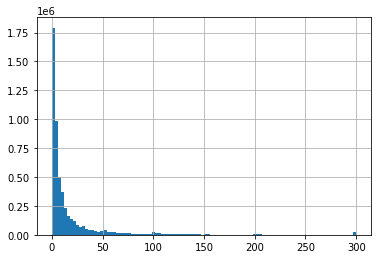

In [518]:
sb1.clip(0,300).hist(bins=100)

In [514]:
sb1.quantile([i/100 for i in range(101)])

TypeError: quantile() got an unexpected keyword argument 'bins'